## Observations and Insights
#### Add your analysis here
---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check if file is properly read into dataframe
mouse_metadata
study_results

#Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, on="Mouse ID")

#Display the data table for preview
merge_df.head()

FileNotFoundError: [Errno 2] File data/Mouse_metadata.csv does not exist: 'data/Mouse_metadata.csv'

In [ ]:
#Check the number of mice.
number_mice=merge_df["Mouse ID"].value_counts()
print(len(number_mice))

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate=merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Optional: Get all the data for the duplicate mouse ID. 
duplicate


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df=merge_df.set_index('Mouse ID')
clean_df=new_df.drop(index='g989')
new_mice_data_df=clean_df.reset_index()
new_mice_data_df.head()

In [ ]:
# Check the number of mice in the clean DataFrame.
new_mouse_count=len(new_mice_data_df["Mouse ID"].value_counts())
print(new_mouse_count)

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Use this straighforward method, create multiple series and put them all in a dataframe at the end.
mean=new_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=new_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=new_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev=new_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_error=new_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_df=pd.DataFrame({"Mean Tumor Volume": mean, 
                     "Median Tumor Volume":median, 
                     "Tumor Volume Variance":variance, 
                     "Tumor Volume Std. Dev.":standard_dev, 
                     "Tumor Volume Std. Err.":standard_error})
drug_df

## Bar and Pie Charts

In [3]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Groupby by treatment
grouped_df=new_mice_data_df.groupby("Drug Regimen")

#Find mice count per treatment
mouse_per_treatment=grouped_df["Drug Regimen"].count()
mouse_per_treatment

#Create bar chart displaying counts
treatment_chart=mouse_per_treatment.plot(kind="bar")

#Set chart labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#Display graph
plt.show()


NameError: name 'new_mice_data_df' is not defined

In [4]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Define x_axis and tick locations
x_axis = np.arange(len(mouse_per_treatment))
tick_locations = [value for value in x_axis]

#Create bar chart and define tick labels
plt.bar(x_axis, mouse_per_treatment, alpha=0.5, align="center")
plt.xticks(tick_locations, list(mouse_per_treatment.index), rotation="vertical")


plt.show()

NameError: name 'mouse_per_treatment' is not defined

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group dataframe by gender
gender_df=new_mice_data_df.groupby("Sex")

#Find mouse counts by gender
gender_count=gender_df["Sex"].count()
gender_count


#Creat Pie Chart, label y axis, and print percentages
gender_chart1=gender_count.plot(kind="pie", y="Sex", autopct="%1.1f%%")

#Display chart
plt.show()

NameError: name 'new_mice_data_df' is not defined

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Labels for the sections of the pie chart
gender= list(gender_count.index)

#Mouse counts for each section
gender_counts=gender_df["Sex"].count()
gender_counts

#Define colors of each pie chart section
colors=["blue", "orange"]

#Create pie chart
plt.pie(gender_counts, labels=gender, colors=colors,
        autopct="%1.1f%%")

#Display chart
plt.show()

NameError: name 'gender_count' is not defined

## Quartiles, Outliers and Boxplots

In [7]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 

# Start by getting the last (greatest) timepoint for each mouse
last_df=new_mice_data_df.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df=pd.merge(last_df, new_mice_data_df)
merge_df

NameError: name 'new_mice_data_df' is not defined

In [8]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset to tumor volume data list
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: unexpected EOF while parsing (<ipython-input-8-dc69f026c24b>, line 16)

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

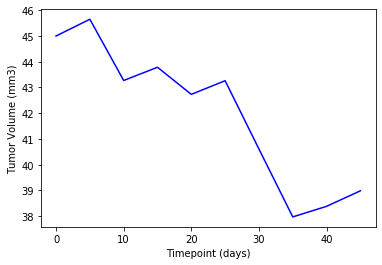

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Obtain rows containing Capomulin as drug regimen
cap_df=new_mice_data_df[new_mice_data_df['Drug Regimen']=="Capomulin"]

#Set index as Mouse ID and pick a mouse treated with Capomulin
cap_df.set_index(["Mouse ID"])
mouse_data=cap_df[cap_df['Mouse ID']=="b128"]

#Define x and y for line chart
timepoints=mouse_data['Timepoint']
tumor_vol=mouse_data['Tumor Volume (mm3)']

#Use plt.plot and use values to display line plot
plt.plot(timepoints, tumor_vol, color="blue", label="Capomulin Treatment of Mouse b128" )
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

The correlation between both factors is 0.84


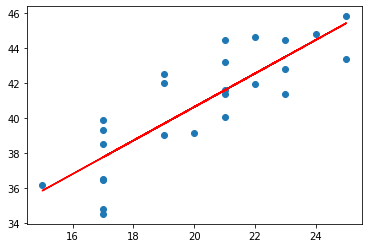

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## I used the cap_df from the previous cell which isolates all mice treated with Capomulin
#cap_df.head()

#Groupby mouse and calculate average weight to get weight per mouse
x_values=cap_df.groupby("Mouse ID")["Weight (g)"].mean()

#Calculate average Tumor Volume per mouse
y_values=cap_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()

#Plot x and y values to scatter plot
plt.scatter(x_values,y_values)

#Label x and y axis ( I am getting this error because I used this to label previous charts, unsure how to fix)
# plt.xlabel("Weight")
# plt.ylabel('Average Tumor Volume')

#Display scatter plot chart
#plt.show()

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Display chart with regression line 
plt.show()

## Correlation and Regression